In [1]:
!pip install emoji

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+) ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [6]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/Conversa do WhatsApp com TI - Talaricos Institute🐃.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [8]:
data_whatsapp = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
data_whatsapp

,Date,Time,Author,Message
0,02/08/2017,12:27,None,"‎The Bighead criou o grupo ""T.I =Talaricos Ins..."
1,05/06/2019,11:06,None,‎The Bighead adicionou você
2,05/06/2019,11:10,The Bighead,<Arquivo de mídia oculto>
3,05/06/2019,11:26,+55 84 9458-1208,🥺
4,05/06/2019,11:29,thyall dgreville,<Arquivo de mídia oculto>
...,...,...,...,...
34544,01/11/2020,18:37,Picoca,<Arquivo de mídia oculto>
34545,01/11/2020,18:37,Picoca,<Arquivo de mídia oculto>
34546,01/11/2020,18:37,+55 84 9458-1208,pai tá off hj
34547,01/11/2020,19:15,None,Picoca: https://www.instagram.com/p/CHEG2b_g--...


In [9]:
data_whatsapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34549 entries, 0 to 34548
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     34549 non-null  object
 1   Time     34549 non-null  object
 2   Author   33907 non-null  object
 3   Message  34549 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [10]:
count_names = data_whatsapp.Author.nunique()
count_names

25

In [11]:
list_names = data_whatsapp.Author.unique()
list_names

array([None, 'The Bighead', '+55 84 9458-1208', 'thyall dgreville',
       'Picoca', '+55 84 8875-8764', 'Gabriel Paulo', 'Rayan',
       'Andre Louco', '+55 84 9904-9110', 'Gabriel igor',
       '+55 84 9469-2349', 'Toim', '+55 84 9121-7115', '+55 84 9429-8172',
       'Dudu Ti', '+55 84 9633-4868', '+55 84 8828-3064', 'Daniel Guerra',
       'Mukilo', '+55 84 9678-3037', '+55 84 9805-9662', 'Pedro',
       '\u200eThe Bighead mudou o nome de "Vini e Vitu pqp 🐃" para "T.I',
       '\u200eAndre Louco mudou o nome de "T.I', '+55 84 9183-9753'],
      dtype=object)

In [12]:
data_whatsapp.fillna(value = "system", inplace=True)

In [13]:
list_names = data_whatsapp.Author.unique()
list_names

array(['system', 'The Bighead', '+55 84 9458-1208', 'thyall dgreville',
       'Picoca', '+55 84 8875-8764', 'Gabriel Paulo', 'Rayan',
       'Andre Louco', '+55 84 9904-9110', 'Gabriel igor',
       '+55 84 9469-2349', 'Toim', '+55 84 9121-7115', '+55 84 9429-8172',
       'Dudu Ti', '+55 84 9633-4868', '+55 84 8828-3064', 'Daniel Guerra',
       'Mukilo', '+55 84 9678-3037', '+55 84 9805-9662', 'Pedro',
       '\u200eThe Bighead mudou o nome de "Vini e Vitu pqp 🐃" para "T.I',
       '\u200eAndre Louco mudou o nome de "T.I', '+55 84 9183-9753'],
      dtype=object)

In [14]:
n = len(list_names)
new_list = []

for i in range(0, n):

  new_list.append(f'User{i}')

new_list

['User0',
 'User1',
 'User2',
 'User3',
 'User4',
 'User5',
 'User6',
 'User7',
 'User8',
 'User9',
 'User10',
 'User11',
 'User12',
 'User13',
 'User14',
 'User15',
 'User16',
 'User17',
 'User18',
 'User19',
 'User20',
 'User21',
 'User22',
 'User23',
 'User24',
 'User25']

In [15]:
dict_name = dict(zip(list_names, new_list)) 

dict_name

{'+55 84 8828-3064': 'User17',
 '+55 84 8875-8764': 'User5',
 '+55 84 9121-7115': 'User13',
 '+55 84 9183-9753': 'User25',
 '+55 84 9429-8172': 'User14',
 '+55 84 9458-1208': 'User2',
 '+55 84 9469-2349': 'User11',
 '+55 84 9633-4868': 'User16',
 '+55 84 9678-3037': 'User20',
 '+55 84 9805-9662': 'User21',
 '+55 84 9904-9110': 'User9',
 'Andre Louco': 'User8',
 'Daniel Guerra': 'User18',
 'Dudu Ti': 'User15',
 'Gabriel Paulo': 'User6',
 'Gabriel igor': 'User10',
 'Mukilo': 'User19',
 'Pedro': 'User22',
 'Picoca': 'User4',
 'Rayan': 'User7',
 'The Bighead': 'User1',
 'Toim': 'User12',
 'system': 'User0',
 'thyall dgreville': 'User3',
 '\u200eAndre Louco mudou o nome de "T.I': 'User24',
 '\u200eThe Bighead mudou o nome de "Vini e Vitu pqp 🐃" para "T.I': 'User23'}

In [16]:
data_whatsapp.Author.replace(to_replace = dict_name)

data_whatsapp

,Date,Time,Author,Message
0,02/08/2017,12:27,system,"‎The Bighead criou o grupo ""T.I =Talaricos Ins..."
1,05/06/2019,11:06,system,‎The Bighead adicionou você
2,05/06/2019,11:10,The Bighead,<Arquivo de mídia oculto>
3,05/06/2019,11:26,+55 84 9458-1208,🥺
4,05/06/2019,11:29,thyall dgreville,<Arquivo de mídia oculto>
...,...,...,...,...
34544,01/11/2020,18:37,Picoca,<Arquivo de mídia oculto>
34545,01/11/2020,18:37,Picoca,<Arquivo de mídia oculto>
34546,01/11/2020,18:37,+55 84 9458-1208,pai tá off hj
34547,01/11/2020,19:15,system,Picoca: https://www.instagram.com/p/CHEG2b_g--...


In [17]:
data_whatsapp['Emoji'] = data_whatsapp['Message'].apply(split_count)
data_whatsapp.head()

,Date,Time,Author,Message,Emoji
0,02/08/2017,12:27,system,"‎The Bighead criou o grupo ""T.I =Talaricos Ins...",[🐃]
1,05/06/2019,11:06,system,‎The Bighead adicionou você,[]
2,05/06/2019,11:10,The Bighead,<Arquivo de mídia oculto>,[]
3,05/06/2019,11:26,+55 84 9458-1208,🥺,[🥺]
4,05/06/2019,11:29,thyall dgreville,<Arquivo de mídia oculto>,[]


In [18]:
"""URLPATTERN = r'(https?://\S+)'
data_whatsapp['urlcount'] = data_whatsapp.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
data_whatsapp"""

"URLPATTERN = r'(https?://\\S+)'\ndata_whatsapp['urlcount'] = data_whatsapp.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()\ndata_whatsapp"

Text(0, 0.5, 'Time')

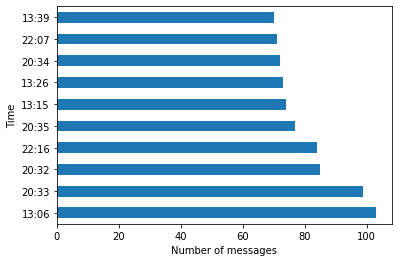

In [19]:
data_whatsapp['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

Text(0, 0.5, 'Date')

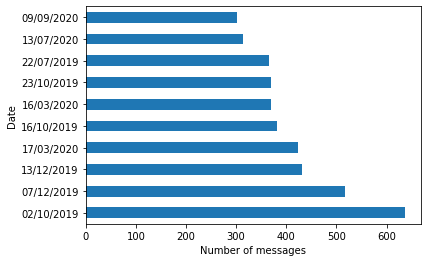

In [20]:
data_whatsapp['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Date')

In [21]:
text = " ".join(review for review in data_whatsapp.Message)
stopwords = set(STOPWORDS)
stopwords.update(["Arquivo", "mídia", "oculto", "de", "pra", "que", "uma", "um", "só", "ve", "da"])

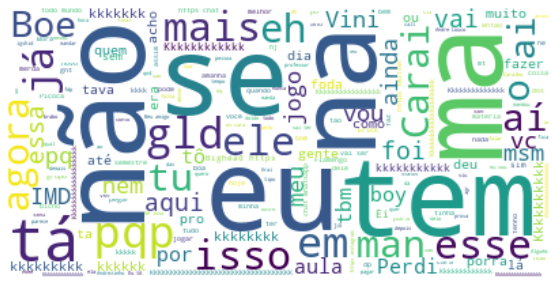

In [22]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [31]:
from collections import Counter

list_message_freq = data_whatsapp.Message.str.split().apply(Counter)

list_message_freq

0        {'‎The': 1, 'Bighead': 1, 'criou': 1, 'o': 1, ...
1        {'‎The': 1, 'Bighead': 1, 'adicionou': 1, 'voc...
2        {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
3                                                 {'🥺': 1}
4        {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
                               ...                        
34544    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
34545    {'<Arquivo': 1, 'de': 1, 'mídia': 1, 'oculto>'...
34546               {'pai': 1, 'tá': 1, 'off': 1, 'hj': 1}
34547    {'Picoca:': 1, 'https://www.instagram.com/p/CH...
34548    {'Fizessem': 1, 'cmg': 1, 'caiam': 1, 'com': 1...
Name: Message, Length: 34549, dtype: object

In [42]:
count = data_whatsapp.Message.str.split(expand=True).stack().value_counts()

count

de                                                  8013
mídia                                               5156
oculto>                                             5150
<Arquivo                                            5150
o                                                   2638
                                                    ... 
95.isaque                                              1
https://chat.whatsapp.com/HKt1ej2TAV05XN94naX3zH       1
posso,                                                 1
ignore,                                                1
20min                                                  1
Length: 23477, dtype: int64

In [44]:
count.head(15)

de          8013
mídia       5156
oculto>     5150
<Arquivo    5150
o           2638
UMA         2060
a           1867
que         1814
é           1565
do          1404
VE          1360
e           1340
pra         1299
no          1133
n           1085
dtype: int64